In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
input_data = np.array([[0,0,0],
              [0,1,0],
              [0,0,1],
              [1,0,0],
              [1,0,1],
              [1,1,1]])

In [3]:
output_data = np.array([[0],
              [1],
              [1],
              [1],
              [0],
              [1]])

In [4]:
def sigmoid(x):
    return (1)/(1+np.exp(-x))

In [5]:
def dsigmoid(x):
    return x*(1-x)

In [14]:
np.random.seed(3)
w0 = np.random.random((3,4))-1
w1 = np.random.random((4,2))-1
w2 = np.random.random((2,1))-1

b0 = np.random.random((1,1))-1
b1 = np.random.random((1,1))-1
b2 = np.random.random((1,1))-1

In [16]:
def feed_forward(data_in,w0,w1,w2,b0,b1,b2):
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0,w0)+b0)
    layer2 = sigmoid(np.dot(layer1,w1)+b1)
    layer3 = sigmoid(np.dot(layer2,w2)+b2)
    
    return layer0,layer1,layer2,layer3

In [19]:
def back_propagation(layer0,layer1,layer2,layer3,actual_y,w0,w1,w2,b0,b1,b2,learning_rate,i):
    l3_error = layer3 - actual_y
    l3_delta = l3_error * dsigmoid(layer3)
    dh3 = np.dot(layer2.T,l3_delta)
    
    l2_error = np.dot(l3_delta,w2.T)
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T,l2_delta)
    
    l1_error = np.dot(l2_delta,w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T,l1_delta)
    
    w2 = w2-(learning_rate * dh3)
    w1 = w1-(learning_rate * dh2)
    w0 = w0-(learning_rate * dh1)
    
    b2 = b2 - (learning_rate * np.mean(l3_delta))
    b1 = b1 - (learning_rate * np.mean(l2_delta))
    b0 = b0 - (learning_rate * np.mean(l1_delta))
    
   
    if i%1==0 and (i!=0):
        loss = np.mean(np.power(layer3 - actual_y,2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1==0:
            print('\n',int(i),loss)
            
    return w0,w1,w2,b0,b1,b2
        

In [20]:
def accuracy(testx,testy):
    correct = 0
    layer0,layer1,layer2,layer3 = feed_forward(testx,w0,w1,w2,b0,b1,b2)
    for i in range(len(testx)):
        if np.argmax(layer3[i])==np.argmax(testy[i]):
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}"

In [21]:
epochs = 10
loss_curve = []
iters = []

In [22]:
for i in range(epochs):
    layer0,layer1,layer2,layer3 = feed_forward(input_data,w0,w1,w2,b0,b1,b2)
    w0,w1,w2,b0,b1,b2 = back_propagation(layer0,layer1,layer2,layer3,output_data,w0,w1,w2,b0,b1,b2,0.05,i)


 1 0.3306162431457153

 2 0.3297546841356975

 3 0.32889730918376303

 4 0.32804414487446004

 5 0.32719521695826237

 6 0.3263505503517501

 7 0.32551016913815517

 8 0.32467409656826535

 9 0.32384235506168385


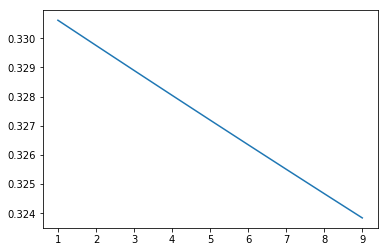

In [23]:
plt.plot(iters,loss_curve)

In [24]:
feed_forward([1,1,0],w0,w1,w2,b0,b1,b2)

([1, 1, 0],
 array([[0.24746951, 0.27852357, 0.10535835, 0.13736864]]),
 array([[0.22583228, 0.21973042]]),
 array([[0.34817751]]))